In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Charger le jeu de données
df = pd.read_csv('drug_consumption.data')

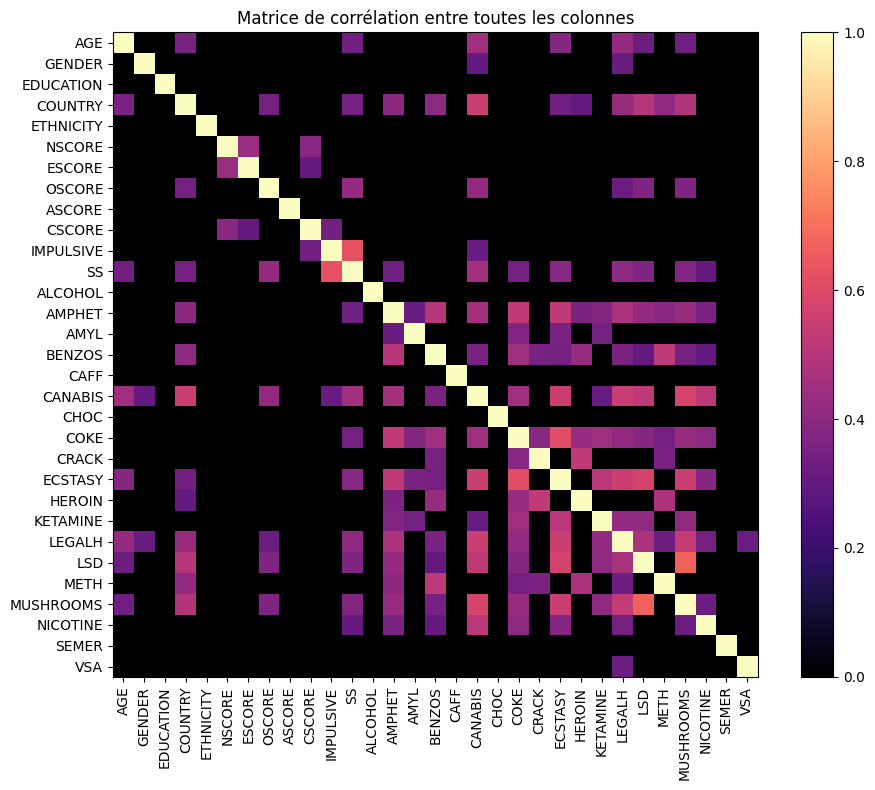

In [16]:
# On compare l'age et la consommation d'alcool

# on fait une matrice de corrélation entre l'age et la consommation d'alcool

# on transforme les données des colonnes en float
# CL0 -> 0
# CL1 -> 1
# CL2 -> 2
# CL3 -> 3
# CL4 -> 4
# CL5 -> 5
# CL6 -> 6

for column in df.columns:
    if column != 'ID':
        df[column] = df[column].replace({'CL0': 0, 'CL1': 1, 'CL2': 2, 'CL3': 3, 'CL4': 4, 'CL5': 5, 'CL6': 6})
        df[column] = df[column] - np.mean(df[column])
        df[column] = df[column] / np.std(df[column])



# On enleve la colonne ID
if 'ID' in df.columns:
    df = df.drop(columns=['ID'])


corr = df.corr()

# on met un seuil pour ne garder que les corrélations significatives
SEUIL = 0.3
corr = corr[(corr >= SEUIL) | (corr <= -SEUIL)]
# On remplace les NaN par 0
corr = corr.fillna(0)
# on fait la valeur absolue de la matrice de corrélation
corr = corr.abs()


# On affiche la matrice de corrélation
plt.figure(figsize=(10, 8))
plt.imshow(corr, cmap='magma', interpolation='none')

plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title('Matrice de corrélation entre toutes les colonnes')
plt.tight_layout()